# 환자 학력 및 나이 그래프화

In [10]:
import numpy as np
import pymysql
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [14]:
# 2단계 : connect(mysql 접속)
host_url = 'rowan-test-db.c2rbzfa0saqk.ap-northeast-2.rds.amazonaws.com'
db = pymysql.connect(host=host_url, port=4406, user='root', passwd='rowan08101!', db='sb_db', charset='utf8')
# 3단계 : cusor : 커서 생성
cursor = db.cursor()

In [15]:
# 4단계 : sql문 작성(데이터 read)
query = "SELECT * FROM sb_db.user_real;"
# 5단계 : pd로 sql문 실행
user_log = pd.read_sql(query, db)

In [16]:
cursor.close()
db.close()

In [19]:
user_log.set_index('idx', inplace=True)

In [20]:
user_log

,userId,birth,gender,education,height,job,name,organization
idx,,,,,,,,
39,A0001,19520219,M,16,172,,소필영,로아신경과의원
42,A0002,19511114,M,16,172,,강일구,로아신경과의원
50,A0003,19970417,F,16,160,,조하영,로아신경과의원
51,A0004,19421004,F,16,160,,김선희,로아신경과의원
91,A0005,19550822,F,16,160,,서영숙,로아신경과의원
...,...,...,...,...,...,...,...,...
1033,nbd003,19490501,F,6,160,,이정호,남양주백병원
1038,ndb004,19550323,F,9,160,,홍정옥,남양주백병원
1041,A0031,19390406,F,12,160,,김애규,로아신경과의원


In [23]:
user_log['age'] = ""

for idx, val in tqdm(user_log.iterrows(), total=user_log.shape[0]):
    temp = 2023 - val["birth"] // 10**4
    user_log['age'][idx] = int(temp)

  0%|                                                                                          | 0/527 [00:00<?, ?it/s]C:\Users\sanghyun\AppData\Local\Temp\ipykernel_18484\3975078305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_log['age'][idx] = int(temp)
100%|███████████████████████████████████████████████████████████████████████████████| 527/527 [00:03<00:00, 152.56it/s]


In [25]:
user_log

,userId,birth,gender,education,height,job,name,organization,age
idx,,,,,,,,,
39,A0001,19520219,M,16,172,,소필영,로아신경과의원,71
42,A0002,19511114,M,16,172,,강일구,로아신경과의원,72
50,A0003,19970417,F,16,160,,조하영,로아신경과의원,26
51,A0004,19421004,F,16,160,,김선희,로아신경과의원,81
91,A0005,19550822,F,16,160,,서영숙,로아신경과의원,68
...,...,...,...,...,...,...,...,...,...
1033,nbd003,19490501,F,6,160,,이정호,남양주백병원,74
1038,ndb004,19550323,F,9,160,,홍정옥,남양주백병원,68
1041,A0031,19390406,F,12,160,,김애규,로아신경과의원,84


In [120]:
np.sum(78<user_log['age'])

189

In [123]:
age_quan = np.quantile(user_log['age'], [0, 1/3, 2/3, 1])

array([26.0, 73.0, 79.0, 97.0], dtype=object)

In [121]:
user_log['Label'] = pd.cut(x=user_log['age'], bins=list(age_quan),labels=['0-73', '74-79', '80-97'])

Text(0, 0.5, 'Population')

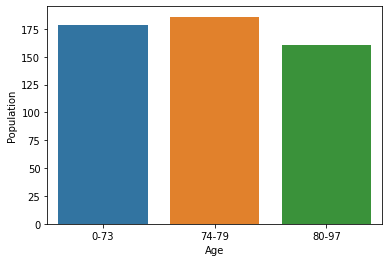

In [126]:
age_p = sns.countplot(x ='Label', data = user_log, )
age_p.set_xlabel("Age")
age_p.set_ylabel("Population")

In [107]:
np.quantile(user_log['education'], [0, 0.4639, 1])

array([ 0., 12., 20.])

In [ ]:
user_log['Label2'] = pd.cut(x=user_log['education'], bins=list(edu_quan),labels=['0-72', '73-78', '79-97'])

C:\Users\sanghyun\Anaconda3\envs\sb-db\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

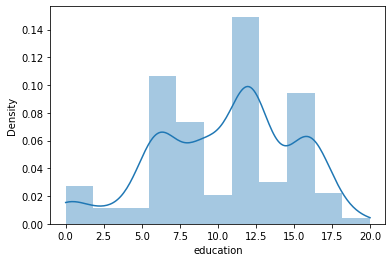

In [75]:
sns.distplot(user_log['education'], kde_kws={'clip': (0.0, 20.0)})

# 표본집단의 고학력자는 초대졸 이상으로 12학년 초과를 고학력자로 판단한다.

표본 집단의 46.39%에 해당하는 고졸(12학년)까지의 환자를 저학력자로 정의한다.